# Python for Numerical Methods - Part 3

## Objectives

In this tutorial you will learn 
* How to load text files filled with numbers
* How to write text files containing numbers
* How to make line plots
* How to save line plots to a PDF file

---
## Getting numerical data in and out of Python via csv files

It is pretty common that you may wish to save your numerical data in a text file so you can plot it later (or share it with someone else).
It is also pretty common that you may be given a data file containin numbers which you wish to use within your Python code.

We are going to learn how to read and write text files in Python. The data files we will use will be provided in a format known as `csv` (comma seperated value).

### Loading data

NumPy has a helpful function for reading and writing csv files called `numpy.genfromtxt()`

In [11]:
import numpy

I've provided three different csv files to illustrate some of the things you may need to do in order to load the data using `numpy.genfromtxt()`.

#### `data_ex2.csv`
If the data file contains columns of numbers only and the numbers are seperated by a single white space characeter, you can load the data like this

In [15]:
data = numpy.genfromtxt('data_ex2.csv')
print(data)

[[0.000e+00 1.111e-04]
 [1.000e+00 3.400e-02]
 [2.000e+00 4.400e-01]
 [3.000e+00 6.600e-01]]


#### `data_ex1.csv`

If the data file contains data seperated by a comma (`,`), we have to tell `numpy.genfromtxt()` this using the argument `delimiter=',`

In [18]:
data = numpy.genfromtxt('data_ex1.csv', delimiter=',')
print(data)

[[      nan       nan]
 [0.000e+00 1.111e-04]
 [1.000e+00 3.400e-02]
 [2.000e+00 4.400e-01]
 [3.000e+00 6.600e-01]]


The numbers look fine, but the `nan`s are not desirable. These appear because in the data file a heading is provided which identifies what is in each column. NumPy requires all data in an `ndarray` be of the same type (e.g. `float64`), we cannot have a mix of numnbers and text. To work around this we tell `getfromtxt()` to skip the first row using `ship_header=1`.

In [21]:
data = numpy.genfromtxt('data_ex1.csv', delimiter=',', skip_header=1)
print(data)

[[0.000e+00 1.111e-04]
 [1.000e+00 3.400e-02]
 [2.000e+00 4.400e-01]
 [3.000e+00 6.600e-01]]


Now everything looks good.

#### `data_ex3.csv`

This file doesn't have column headings, instead it has a comment which is marked with a `!`. The file also has comma seperated values.
Let's try the following

In [25]:
data = numpy.genfromtxt('data_ex3.csv', delimiter=',')
print(data)

ValueError: Some errors were detected !
    Line #2 (got 2 columns instead of 1)
    Line #3 (got 2 columns instead of 1)
    Line #4 (got 2 columns instead of 1)
    Line #5 (got 2 columns instead of 1)

The comment line is messing things up when we try and load the data. We can indicate comment lines using `comments='!'`.

In [27]:
data = numpy.genfromtxt('data_ex3.csv', delimiter=',', comments='!')
print(data)

[[0.000e+00 1.111e-04]
 [1.000e+00 3.400e-02]
 [2.000e+00 4.400e-01]
 [3.000e+00 6.600e-01]]


Finally this looks okay.

### Writing data to a file

Let's create so fake data.

In [32]:
A = numpy.zeros( (5,3) )
c = 1.0
for i in range(5): # loop over rows
    for j in range(3): # loop over columns
        A[i, j] = c
        c += 1.0

In [34]:
print(A)

[[ 1.  2.  3.]
 [ 4.  5.  6.]
 [ 7.  8.  9.]
 [10. 11. 12.]
 [13. 14. 15.]]


We will use `numpy.savetxt()` to save the data into an ascii file.

We provide `.savetxt()` the name we wish the data to be saved in, the `ndarray` we want to save.
We can optionally provided control on how the numbers will be formatted via the argument `fmt` and we can specify the column seperated via `delimiter`. Below we choose to save the `ndarray` `A` into a file called `matrix.csv` and we want the data to be printed with the sign shown (`+`) in exponential notation `e` and with 8 digits after the decimal point. We also wanted the data to be seperated by a comma.

To achieve this we can do the following

In [37]:
numpy.savetxt('matrix.csv', A, fmt='%+.8e', delimiter=',') 

You should verify that the file is created and the numbers in the file are formmatted as we requested.

---
## Basic line plotting and figure creation

As a starting point, let's define what we would like to be able to achieve.
The objective is
* to create a plot of the function $\sin(\theta)$ over the range $\theta = [-\pi, \pi]$
* on the same plot display the function $\cos(\theta)$ over the range $\theta = [-\pi, \pi]$
* add axis labels to our plot
* save the plot to a PDF file

### First we will generate the data to plot
1. We first will create an array of values holding all of our angles $\theta$, called `thetas`.
2. Then we evaluate $\sin()$ and $\cos()$ at each of our discrete values of $\theta$. We will store the results in two variables `f_sin` and `f_cos`.

We choose the number of sample points for our plot to be 420 (it's an arbitrary number). We then compute the angle we want between each sample point.

In [44]:
npoints = 420 # Number of sample points
dtheta = (numpy.pi - (-numpy.pi)) / float(npoints - 1)

Next we create an empty `ndarray` of the correct length, and fill it with angle

In [47]:
thetas = numpy.zeros(npoints)
for i in range(npoints):
    thetas[i] = -numpy.pi + i * dtheta

As a check we print out the computed end points of our `thetas` array and compare them with $\pm \pi$.

In [50]:
print(thetas[0], thetas[npoints-1], -numpy.pi, numpy.pi)

-3.141592653589793 3.141592653589793 -3.141592653589793 3.141592653589793


Lastly we evaluate $\sin$ and $\cos$ functions the NumPy way (e.g. we compute them all at once).

In [53]:
f_sin = numpy.sin(thetas)
f_cos = numpy.cos(thetas)

### Now for the plot

We will import a plotting package (`matplotlib`), moveover we will use a subset of it (`pyplot`).

In [57]:
import matplotlib.pyplot as plt

For basic line plotting, we can use the `plot()` function from `plt`. We pass to `plot()` the "x-values" (here `thetas`) and the "y-values" (here `f_sin` and `f_cos`). We want two plots on one graph, so we call plot twice, once with `f_sin` and once with `f_cos`. The code is below

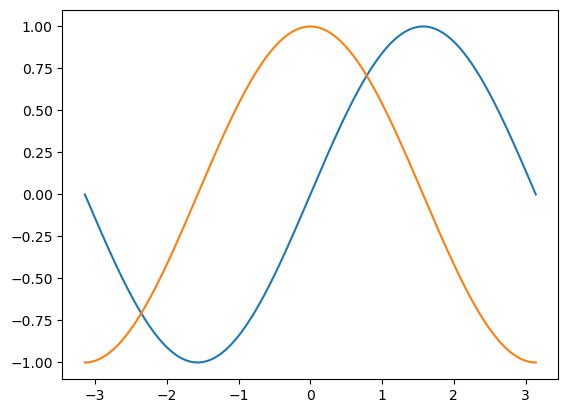

In [60]:
ax = plt.plot(thetas, f_sin)
ax = plt.plot(thetas, f_cos)

To add axis labels, we do this

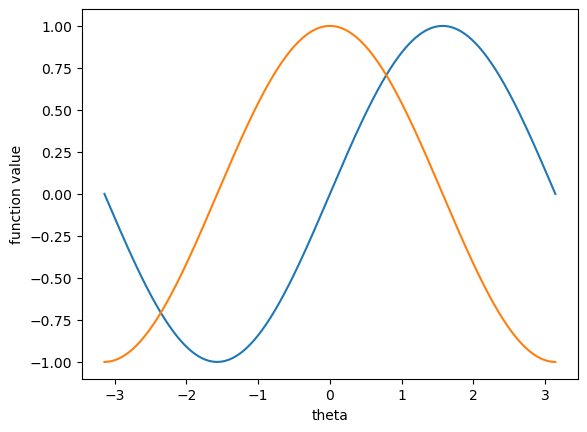

In [63]:
ax = plt.plot(thetas, f_sin)
ax = plt.plot(thetas, f_cos)
_ = plt.xlabel('theta') # Add x axis label
_ = plt.ylabel('function value') # Add y axis label

Lets enforce the x-axis data range which will be displayed on our plot

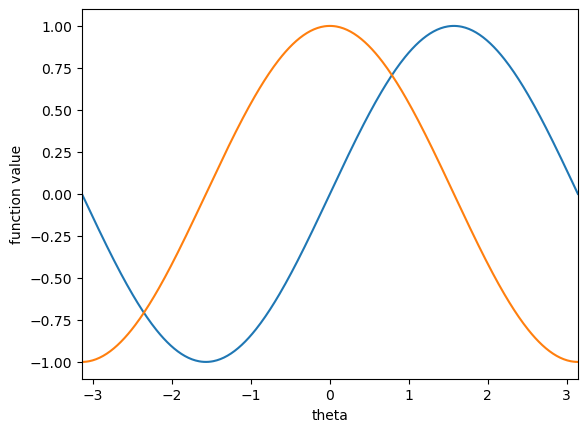

In [66]:
ax = plt.plot(thetas, f_sin)
ax = plt.plot(thetas, f_cos)
_ = plt.xlabel('theta')
_ = plt.ylabel('function value')
_ = plt.xlim(-numpy.pi, numpy.pi) # Restrict x-axs range. Use .ylim(min_t, max_y) for restricting y-axis

Let's label each curve and add these labels into a legend.

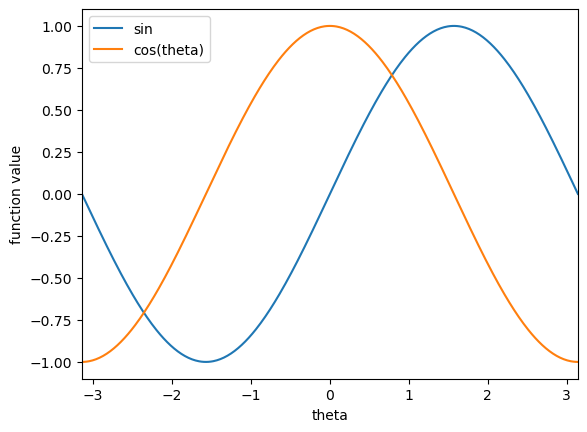

In [69]:
ax = plt.plot(thetas, f_sin, label='sin') # Add a label to your data
ax = plt.plot(thetas, f_cos, label='cos(theta)') # Add a label to your data
_ = plt.xlabel('theta')
_ = plt.ylabel('function value')
_ = plt.xlim(-numpy.pi, numpy.pi)
_ = plt.legend() # Display labels using legend()

Lastly, lets fiddle with the colours (arg `c` or `color`), linestyles (arg `ls` or `linestyle`) and line width (arg `lw` or `linewidth`)

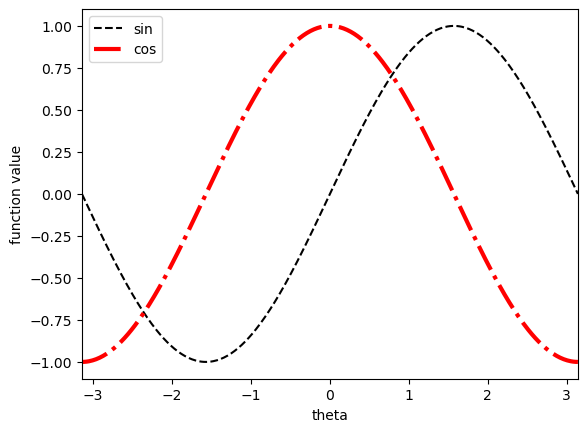

In [72]:
ax = plt.plot(thetas, f_sin, label='sin', c='k', ls='--') # Use `c`, `ls` args to control color, linestyle
ax = plt.plot(thetas, f_cos, label='cos', color='r', linestyle='-.', linewidth=3.0) # Use `lw` or `linewidth` arg to control line thickness
_ = plt.xlabel('theta')
_ = plt.ylabel('function value')
_ = plt.xlim(-numpy.pi, numpy.pi)
_ = plt.legend()

Some common line colours you can use with `color` include
* `r` red
* `b` blue
* `g` green
* `k` black
* `y` yellow
* `c` cyan
* `m` magenta

More can be found here https://matplotlib.org/stable/gallery/color/named_colors.html

Some common line styles you can use with `linestyle` include
* `-` solid
* `:` dotted
* `--` dashed
* `-.` dashdot

To save the figure to a PDF, add `plt.savefig(FILENAME)` at the end of your plot commands, making sure to use the file extension `.pdf`.

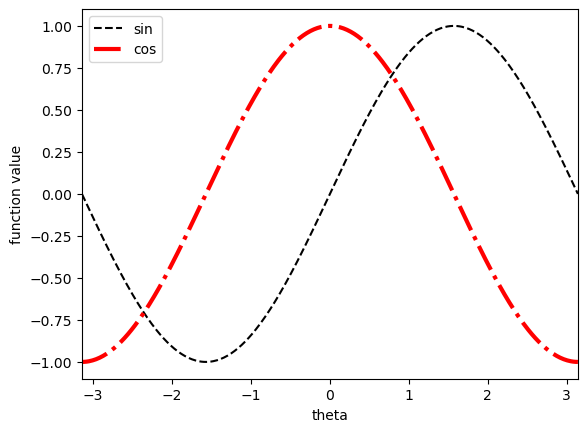

In [77]:
ax = plt.plot(thetas, f_sin, label='sin', c='k', ls='--')
ax = plt.plot(thetas, f_cos, label='cos', color='r', linestyle='-.', linewidth=3.0)
_ = plt.xlabel('theta')
_ = plt.ylabel('function value')
_ = plt.xlim(-numpy.pi, numpy.pi)
_ = plt.legend()
_ = plt.savefig("sincos.pdf") # Save the plot to a PDF

The complete Python script to generate the plot above (without comments) can be found in `python_intro_pt3.py`.